<a href="https://colab.research.google.com/github/gopikamuruganantham/Registration-Form/blob/main/svm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df["target"].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


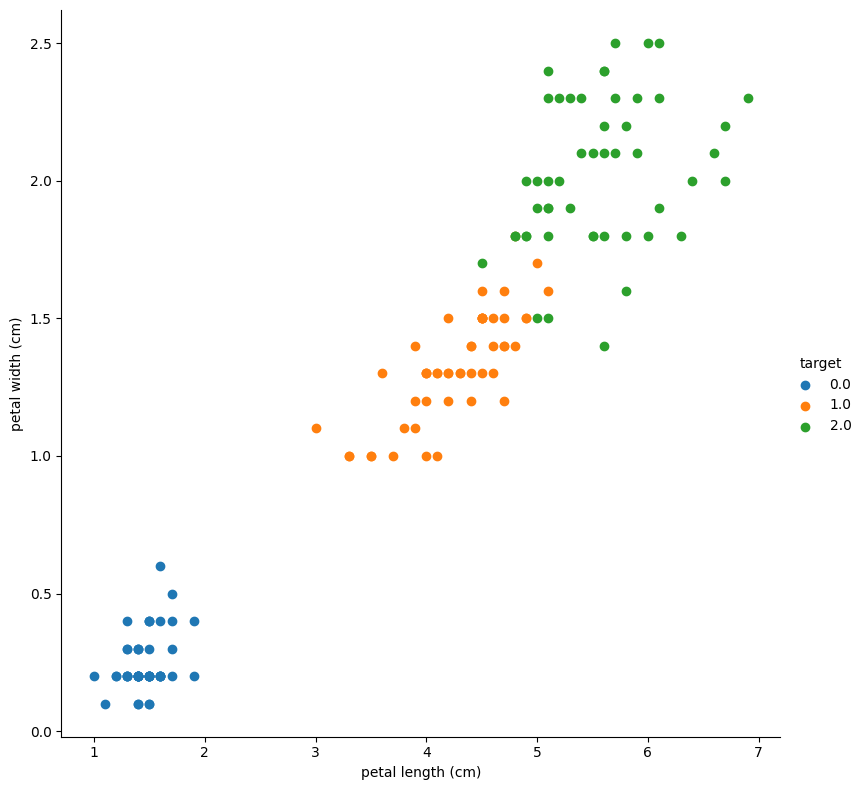

In [ ]:
sns.FacetGrid(df, hue="target", height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load a dataset
iris = load_iris()

# Create and fit the model
model = SVC(kernel='linear', C=1)
model.fit(iris.data, iris.target)


SVC(C=1, kernel='linear')

In [ ]:
#accuracy
model.score (iris.data, iris.target)

0.9933333333333333

In [ ]:
# make predictions

expected = iris.target

predicted = model.predict(iris.data)

In [ ]:
from sklearn import metrics
#summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [ ]:
 X = iris.data[:, :2] # we only take the first two features.

y = iris.target


In [ ]:
from sklearn import svm
def MySVMClassifier(my_kernel, my_C, my_gamma):
  svc = svm.SVC(kernel=my_kernel, C=my_C, gamma=my_gamma)
  svc.fit(X, y)
  h=0.02
  x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter (X[:, 0], X[:, 1], c=y)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.show()

In [ ]:
i = interact (MySVMClassifier, my_kernel=['linear', 'rof'], my_C=(0.001,10), my_gamma = (1,100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rof'), value='linear'), FloatSlide…